In [592]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score ,classification_report
import numpy as np

In [593]:

readfile=pd.read_csv("titanic.csv",index_col=False)
file=pd.DataFrame(readfile)

In [594]:
file.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [595]:
file['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [596]:
file['Sex']=file['Sex'].replace("male",0).replace("female",1)

In [597]:
file.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [598]:
file["Age"].fillna(file["Age"].median(skipna=True), inplace=True)

In [599]:
print(file.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [600]:
file['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [601]:
file['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [602]:
file['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [603]:
file.drop(columns=['Cabin'], inplace=True)
file.drop(columns=['Ticket'], inplace=True)
file.drop(columns=['Name'], inplace=True)
file.drop(columns=['PassengerId'], inplace=True)


In [604]:
file.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [605]:
file['Embarked']=file['Embarked'].replace("S",0).replace("C",1).replace("Q",2)
file['Embarked'].fillna(file['Embarked'].mode()[0], inplace=True)

In [606]:
file.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


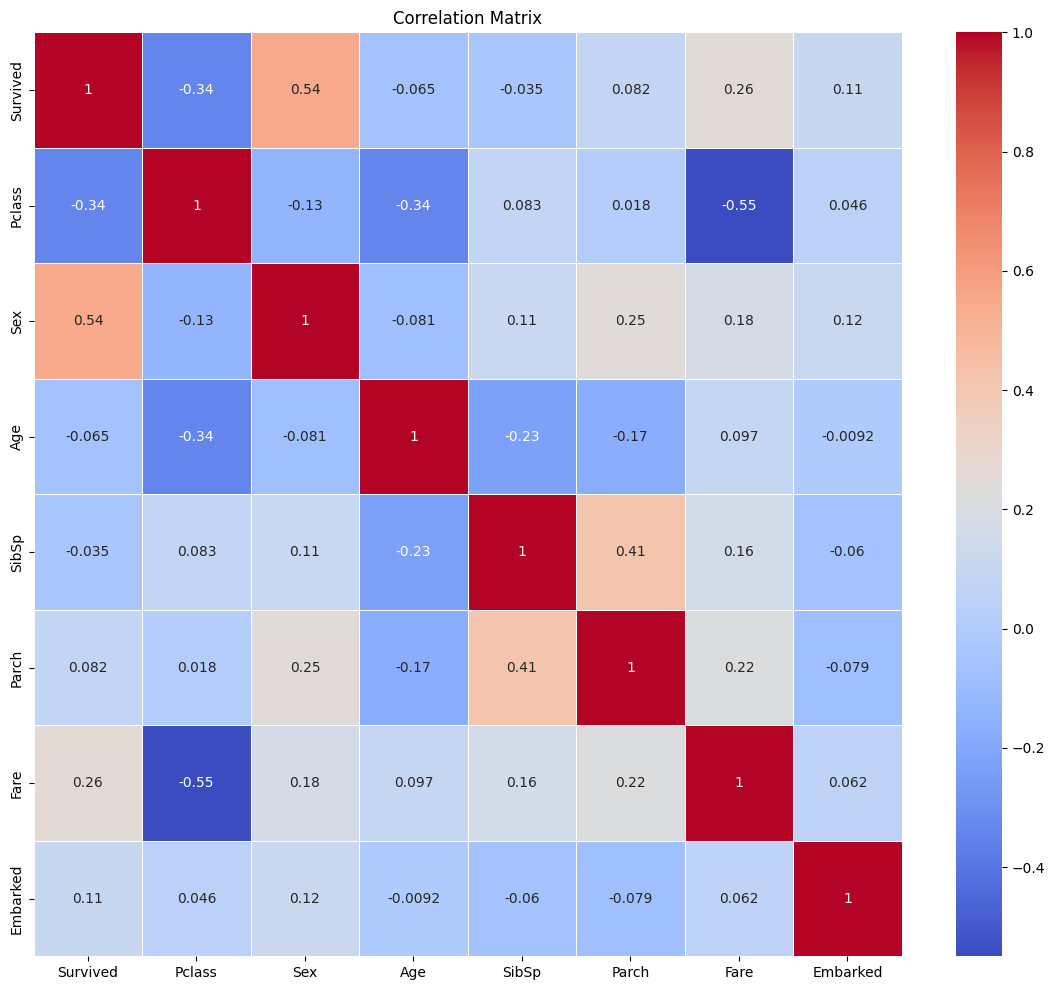

In [607]:

correlation_matrix = file.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [608]:
file.drop(columns=['Parch'], inplace=True)
file.drop(columns=['SibSp'], inplace=True)
file.drop(columns=['Age'], inplace=True)

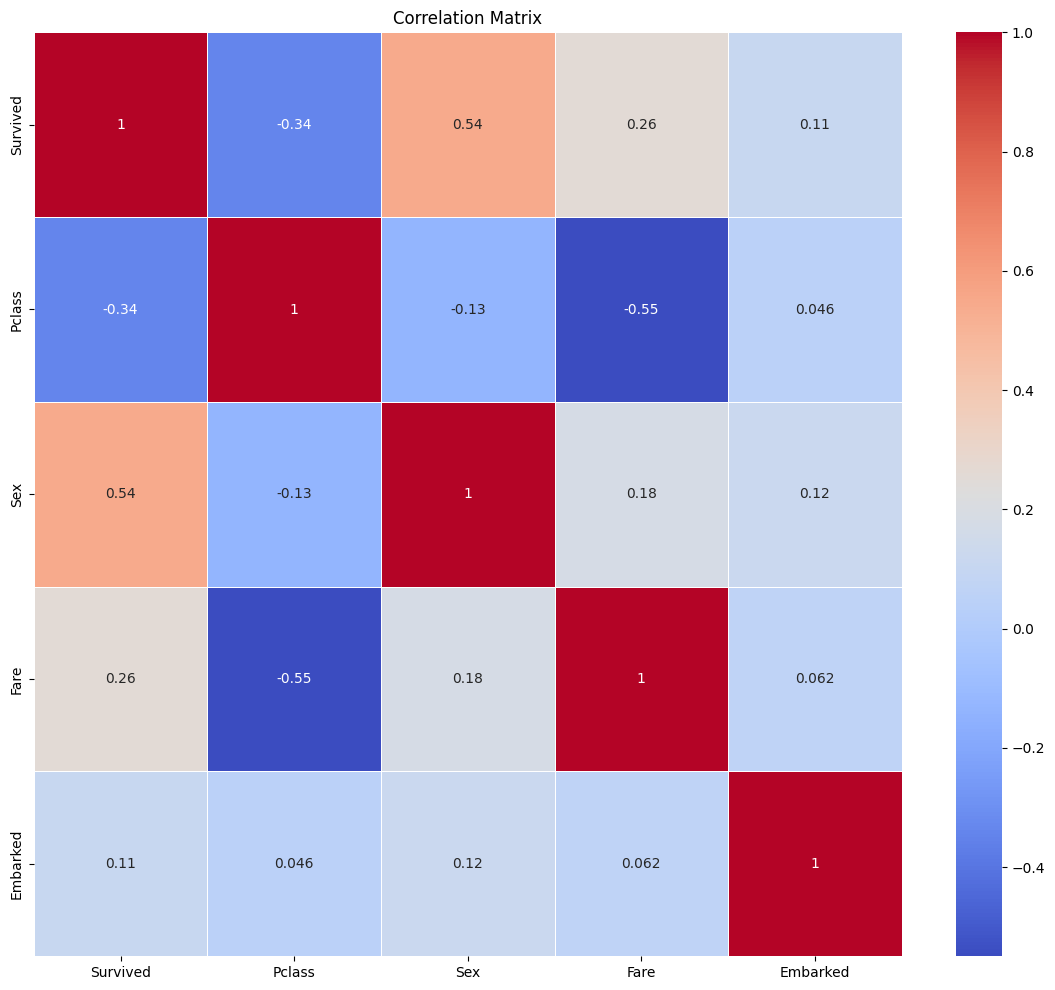

In [609]:
correlation_matrix = file.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [610]:
independent=file.drop("Survived", axis=1)
dependent=file["Survived"]
independent.describe()



,Pclass,Sex,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,32.204208,0.361392
std,0.836071,0.477990,49.693429,0.635673
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.910400,0.000000
50%,3.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,31.000000,1.000000
max,3.000000,1.000000,512.329200,2.000000


In [611]:
scaler = StandardScaler()
scaler.fit(independent)
independent  = scaler.transform(independent)

In [640]:


class SVM_classifier():
    
    # Initiating the hyperparameters
    
    def __init__(self, lr,lambda_parameter,it,tol):
        self.learningrate = lr
        self.lambda_parameter = lambda_parameter
        self.tolerance=tol
        self.iterations=it
        
        
    # Fitting the dataset to SVM Classifier 
    def fit(self, X, y):
        self.n_samples, self.n_features = X.shape
        self.w = np.zeros(self.n_features)
        self.b = 0
        self.X = X
        self.y = y  
        prev_cost = float('inf')
        self.cost_history=[]
        epoch = 0
        for i in range(self.iterations):
            cost = self.calculate_cost()
            if abs(prev_cost - cost) < self.tolerance:
                break
            self.cost_history.append(cost)
            prev_cost = cost
            self.update_weights()
            epoch += 1

        print(f"Training completed in {epoch} epochs.")
        plt.plot(range(1, epoch + 1), self.cost_history)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.title('Cost vs. Epoch')
        plt.show()
            
    def update_weights(self):
        
        y_labelled = np.where(self.y <=0,-1,1)
        dw_sum = np.zeros_like(self.w)
        db_sum = 0
        
        for index,x_i in enumerate(self.X):
            condition = y_labelled[index] * (np.dot(x_i,self.w) - self.b) >=1
            
            if (condition == True):
                
                dw_sum  += 2*self.lambda_parameter * self.w
                db_sum += 0
                
            else:
                
                dw_sum += 2* self.lambda_parameter*self.w - np.dot(x_i,y_labelled[index])
                db_sum += y_labelled[index]
            mean_dw = dw_sum / len(self.X)
            mean_db = db_sum / len(self.X)

            self.w = self.w - self.learningrate*mean_dw
            self.b = self.b - self.learningrate*mean_db
            
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        preds = np.where(output >= 0, 1, -1)
        y_pred = np.where(preds <= -1, 0, 1)
        return y_pred
    
    def calculate_cost(self):
        y = np.where(self.y <= 0, -1, 1)
        margin = 1 - y * (np.dot(self.X, self.w) - self.b)
        hinge_loss = np.maximum(0, margin)
        cost = 0.5 * np.dot(self.w, self.w) + self.lambda_parameter * np.mean(hinge_loss)
        return cost


In [641]:
class LogisticRegression:
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def __init__(self, lr, it, tolerance):
        self.learningrate = lr
        self.iterations = it
        self.tolerance = tolerance
        self.weights = None
        self.bias = None
        self.cost_history = []

    def fit(self, x, y):
        sample, n = x.shape
        self.weights = np.zeros(n)
        self.bias = 0

        for i in range(self.iterations):
            linear = np.dot(x, self.weights) + self.bias
            predictions = self.sigmoid(linear)

            dw = (1 / sample) * np.dot(x.T, (predictions - y))
            db = (1 / sample) * np.sum(predictions - y)

            self.weights = self.weights - self.learningrate * dw
            self.bias = self.bias - self.learningrate * db

            cost = (-1 / sample) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
            self.cost_history.append(cost)

            if i > 0 and abs(self.cost_history[-2] - cost) < self.tolerance:
                break
        plt.plot(range(1, i+2), self.cost_history)
        plt.xlabel('Epoch')
        plt.ylabel('Cost')
        plt.title('Cost vs. Epoch')
        plt.show()
        

    def predict(self, x):
        linear = np.dot(x, self.weights) + self.bias
        predictions = self.sigmoid(linear)
        preds = [0 if y <= 0.5 else 1 for y in predictions]
        return preds

In [642]:
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size=0.2, random_state=42)

In [649]:
classifier = SVM_classifier(lr = 0.0000001,lambda_parameter = 0.01,it=500,tol=1e-9)
model = LogisticRegression(lr = 0.01,it=5000,tolerance=1e-9)

0.01
0.009999820795384936
0.009999642162566035
0.00999946410154208
0.009999286612311847
0.009999109694874107
0.009998933349227643
0.009998757575371232
0.009998582373303649
0.00999840774302367
0.009998233684530074
0.00999806019782164
0.009997887282897142
0.009997714939755356
0.009997543168395065
0.00999737196881504
0.00999720134101406
0.009997031284990904
0.009996861800744347
0.009996692888273168
0.00999652454757614
0.009996356778652047
0.009996189581499658
0.009996022956117758
0.00999585690250512
0.00999569142066052
0.009995526510582737
0.00999536217227055
0.009995198405722732
0.009995035210938063
0.009994872587915316
0.009994710536653276
0.009994549057150715
0.009994388149406409
0.009994227813419135
0.009994068049187677
0.009993908856710804
0.009993750235987298
0.009993592187015933
0.009993434709795489
0.009993277804324742
0.009993121470602467
0.009992965708627444
0.009992810518398452
0.009992655899914264
0.009992501853173658
0.00999234837817541
0.009992195474918301
0.0099920431434011

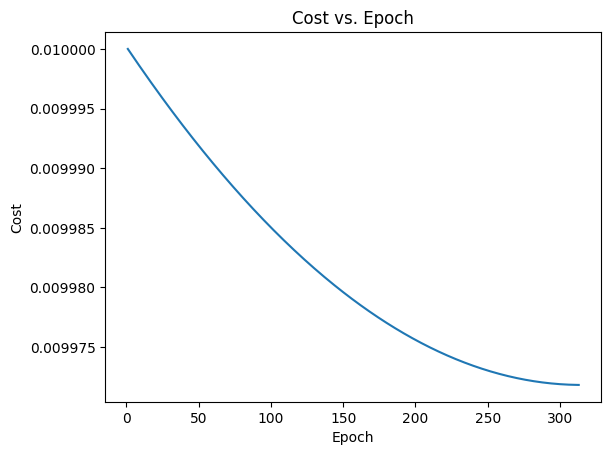

In [650]:
classifier.fit(X_train,y_train)


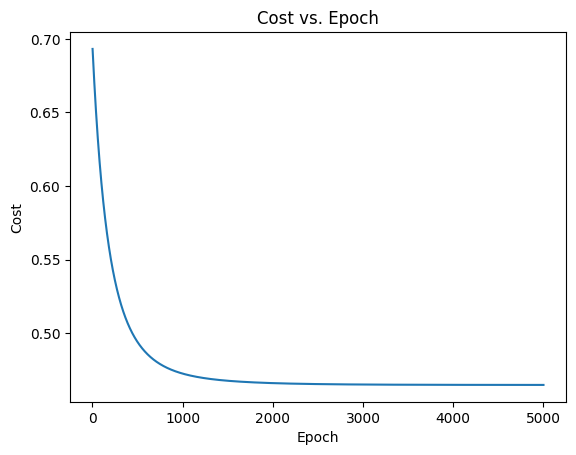

In [617]:
model.fit(X_train,y_train)

In [618]:
SVM_train_pred = classifier.predict(X_train)
Logistic_train_pred=model.predict(X_train)
Logistic_accuracy=accuracy_score(y_train,Logistic_train_pred)
SVM_accuracy  = accuracy_score(y_train,SVM_train_pred)
classification_repLR = classification_report(y_train,Logistic_train_pred,zero_division=1)
classification_repSVM = classification_report(y_train,SVM_train_pred,zero_division=1)

print('Accuracy of SVM on train data = ',SVM_accuracy)
print("Classification Report of SVM on train data:\n", classification_repSVM)
print('Accuracy of Logistic Regression on train data = ',Logistic_accuracy)
print("Classification Report of Logistic Regression on train data:\n", classification_repLR)


Accuracy of SVM on train data =  0.7879213483146067
Classification Report of SVM on train data:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       444
           1       0.74      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.78      0.77      0.77       712
weighted avg       0.79      0.79      0.79       712

Accuracy of Logistic Regression on train data =  0.7851123595505618
Classification Report of Logistic Regression on train data:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       444
           1       0.73      0.68      0.71       268

    accuracy                           0.79       712
   macro avg       0.77      0.76      0.77       712
weighted avg       0.78      0.79      0.78       712



In [619]:
SVM_test_pred = classifier.predict(X_test)
Logistic_test_pred=model.predict(X_test)
Logistic_accuracy=accuracy_score(y_test,Logistic_test_pred)
SVM_accuracy  = accuracy_score(y_test,SVM_test_pred)
classification_repLR = classification_report(y_test,Logistic_test_pred,zero_division=1)
classification_repSVM = classification_report(y_test,SVM_test_pred,zero_division=1)

print('Accuracy of SVM on test data = ',SVM_accuracy)
print("Classification Report of SVM on test data:\n", classification_repSVM)
print('Accuracy of Logistic Regression on test data = ',Logistic_accuracy)
print("Classification Report of Logistic Regression on test data:\n", classification_repLR)

Accuracy of SVM on test data =  0.7821229050279329
Classification Report of SVM on test data:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy of Logistic Regression on test data =  0.7821229050279329
Classification Report of Logistic Regression on test data:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

